# Customers Churn Predictor

## Description

### Objective

`Predicting Churn Customers using Artificial Neural Networks.`

### Problem Statement
`1. What influences the Churn possibility ?`
<br>
`2. What is the best model so far ?`
<br>
`3. How much data is wrongly predicted ?`
<br>
`4. How to improve the model prediction ?`

## Working Area
### 1. Import Libraries

In [1]:
# Import base libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting
from sklearn.model_selection import train_test_split

# Data Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder

# Feature selection
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Data Imbalance
from imblearn.over_sampling import SMOTE

# Import model
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, concatenate
from pandas.core.internals.concat import concat_arrays

# Model Evaluation
import tensorflow_addons as tfa
from tensorflow_addons.metrics import F1Score
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

# Model saving
import joblib

# Ignore the warning notes
import warnings
warnings.filterwarnings("ignore")

### 2. Data Loading

In [2]:
# Data loading
df = pd.read_csv('Telco-Customer-Churn.csv')

Description
<br>
customerID : Customer ID
<br>
gender : Male or Female
<br>
SeniorCitizen : Whether the customer is a senior citizen or not ( 1 = Yes, 0 = No )
<br>
Partner : Whether the customer has a partner or not ( Yes, No )
<br>
Dependents : Whether the customer has dependents or not ( Yes, No )
<br>
tenure : Number of months the customer has stayed with the company
<br>
PhoneService : Whether the customer has a phone service or not ( Yes, No )
<br>
MultipleLines : Whether the customer has multiple lines or not ( Yes, No, No phone service )
<br>
InternetService : Customer’s internet service provider ( DSL, Fiber optic, No )
<br>
OnlineSecurity : Whether the customer has online security or not ( Yes, No, No internet service )
<br>
OnlineBackup : Whether the customer has online backup or not ( Yes, No, No internet service )
<br>
DeviceProtection : Whether the customer has device protection or not ( Yes, No, No internet service )
<br>
TechSupport : Whether the customer has tech support or not ( Yes, No, No internet service )
<br>
StreamingTV : Whether the customer has streaming TV or not ( Yes, No, No internet service )
<br>
StreamingMovies : Whether the customer has streaming movies or not ( Yes, No, No internet service )
<br>
Contract : The contract term of the customer (Month-to-month, One year, Two year)
<br>
PaperlessBilling : Whether the customer has paperless billing or not ( Yes, No )
<br>
PaymentMethod : The customer’s payment method ( Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic) )
<br>
MonthlyCharges : The amount charged to the customer monthly
<br>
TotalCharges : The total amount charged to the customer
<br>
Churn : Whether the customer churned or not ( Yes or No )

In [3]:
# Brief check top 5 rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Brief check bottom 5 rows
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# Checking whether the data type is matches the description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Statement :<br>
All columns are in the correct type, except TotalCharges.

In [6]:
# Convert TotalCharges type from string to number
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
# Drop the duplicate rows
df = df.drop_duplicates()

In [8]:
# Drop customerID
df = df.drop('customerID', axis = 1)

In [9]:
# Check number of rows with missing values
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Statement :<br>
11 rows with missing values founded in TotalCharges column.

In [10]:
# Check the composition null rows
print(round(df['TotalCharges'].isnull().sum() / len(df) * 100,2), '% from dataset, is null rows.')

0.16 % from dataset, is null rows.


Statement :<br>
Since total number of missing values row is less than 5% of overall dataset, therefore rows with missing values will be terminated.<br>
Alternatively, check the data distribution and fill with mean if the skewness value is between -0.5 to 0.5 or else fill it with median value.

In [11]:
# Drop the missing value rows from dataframe
df = df.dropna()

### 3. Exploratory Data Analysis (EDA)

In [12]:
# Make function to calculate the column composition
def PieComposition(dataframe, column):
    palette_color = sns.color_palette('muted')
    data = {}
    freq = {}
    datalen = len(dataframe[column].unique())
    x = np.arange(datalen)
    dq = dataframe[column].unique()
    for i in x:
        data[i] = dq[i]
        freq[i] = dataframe[column][dataframe[column] == dq[i]].value_counts().sum()
    data = list(data.values())
    freq = list(freq.values())
    plt.pie(freq, labels = data, colors=palette_color, autopct='%.0f%%')

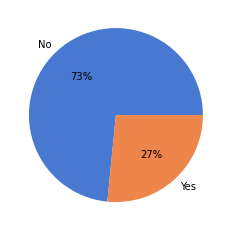

In [13]:
# Check the composition of target
PieComposition(df, 'Churn')

In [14]:
# Shows the target quantity for every value
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

Statement :<br>
Since the target is mildly unbalanced, therefore data imbalance will be handled prior to model training.<br>
In view of the fact that number of dataset is tends to be small, therefore oversampling method will be performed.

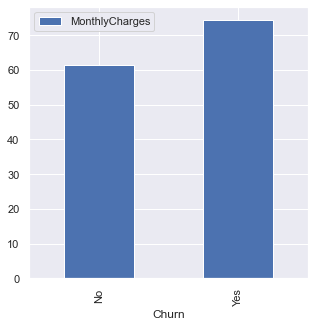

In [15]:
# Check Monthly Charges according to data target
sns.set(rc={"figure.figsize":(5, 5)})
df[['MonthlyCharges', 'Churn']].groupby('Churn').mean().plot.bar()
plt.show()

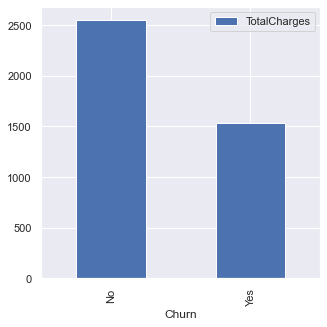

In [16]:
# Check Monthly Charges according to data target
df[['TotalCharges', 'Churn']].groupby('Churn').mean().plot.bar()
plt.show()

Statement :<br>
Somehow, churned customers have higher average monthly charges than unchurned customers. While in the other side, churned customers have higher average total charges than unchurned customers. This is possible since the unchurned customers pay in longer time, thus causing the total charges to be greater than the unchurned ones.

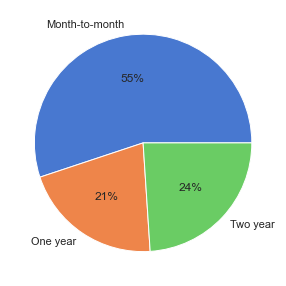

In [17]:
# Check the composition of contract column
PieComposition(df, 'Contract')

Statement :<br>
Most customers pay monthly contract. While the most profitable payments contract is yearly contract ( since the company obtain a larger amount of fresh cash in short time ), added bonus on yearly contract will surely increase the number of customers who paid for yearly contract.

<AxesSubplot:>

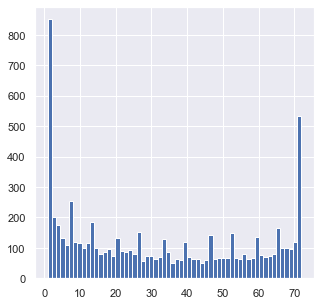

In [18]:
# Tenure's plot
df['tenure'].hist(bins = 60)

In [19]:
# Calculate tenure column statistical parameters
df['tenure'].value_counts().sort_values( ascending = False ).head(2)

1     613
72    362
Name: tenure, dtype: int64

Statement :<br>
2 most frequent months is 1 and 72 months. Most of customers last either in very short of time period or very long time period.

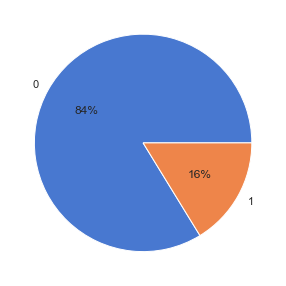

In [20]:
# Check the composition of senior citizen
PieComposition(df, 'SeniorCitizen')

Statement :<br>
Since most of customers is not a senior citizen, compare the number of senior citizen to churned customers.

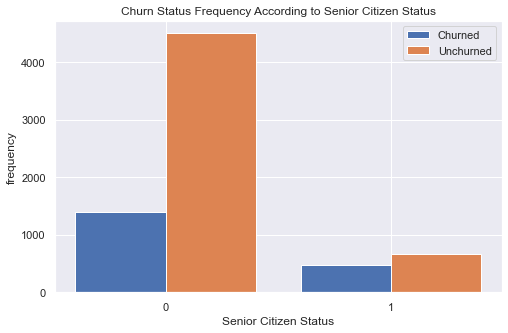

In [21]:
# Senior Citizen Status related to Churn Status
data = np.array([0,1])
data_axis = np.arange(len(data))

df_c = df[df['Churn'] == 'Yes'] # Churned
freq_0c = df_c.SeniorCitizen[df_c['SeniorCitizen'] == 0].value_counts().sum()
freq_1c = df_c.SeniorCitizen[df_c['SeniorCitizen'] == 1].value_counts().sum()
freq_c = [freq_0c, freq_1c]

df_uc = df[df['Churn'] == 'No'] # Unchurned
freq_0uc = df_uc.SeniorCitizen[df_uc['SeniorCitizen'] == 0].value_counts().sum()
freq_1uc = df_uc.SeniorCitizen[df_uc['SeniorCitizen'] == 1].value_counts().sum()
freq_uc = [freq_0uc, freq_1uc]

fig = plt.figure(figsize = (8, 5))
plt.bar(data_axis - 0.2, freq_c, 0.4, label = 'Churned')
plt.bar(data_axis + 0.2, freq_uc, 0.4, label = 'Unchurned')
plt.xticks(data_axis, data)

plt.xlabel('Senior Citizen Status')
plt.ylabel('frequency')
plt.title('Churn Status Frequency According to Senior Citizen Status')
plt.legend()
plt.show()

Statement :<br>
Based on Churned Status ratio, we can clearly that Senior Citizen are more likely to churned compared to Younger Citizen. 

### 4. Data Preprocessing

In [22]:
# Split train test set with Inference Model
data_inf = df.sample(10, random_state = 1)

# Remove Inference Model from dataset
data_train_val_test = df.drop(data_inf.index)

# Reset index for both dataset
data_train_val_test.reset_index(drop = True , inplace = True)
data_inf.reset_index(drop = True , inplace = True)

In [23]:
# Split data features and target
X = data_train_val_test.drop('Churn', axis = 1)
#y = pd.DataFrame(data_train_val_test['Churn'])
y = pd.DataFrame(data_train_val_test['Churn'])

# Split data train, validation, and test set
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.20, random_state = 1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.20, random_state = 1)

In [24]:
# Make a function for showing numerical outliers
def Show_LLUL(df, variable, multiplier = 1.5):
    if df[variable].skew() > -0.5 and df[variable].skew() < 0.5:
        LL = df[variable].mean() - 3 * df[variable].std()
        UL = df[variable].mean() + 3 * df[variable].std() 
    else:
        Q1 = df[variable].quantile(0.25)
        Q3 = df[variable].quantile(0.75)
        IQR = Q3 - Q1
        LL = Q1 - multiplier * IQR
        UL = Q3 + multiplier * IQR
    out_df = df[(df[variable] > UL) | (df[variable] < LL)]
    out_df.sort_values(variable, ascending = False, inplace = True)
    print(out_df.shape[0] / df.shape[0] * 100, '% is considered as outliers')
    return out_df

In [25]:
# Get numerical and categorical columns
num_columns = ['tenure' , 'MonthlyCharges' , 'TotalCharges']
cat_columns = X_train.select_dtypes(include = ['object']).columns.tolist() + ['SeniorCitizen']

# Print all numerical columns
print('Numerical list :', num_columns)
print('Categorical list :', cat_columns)

Numerical list : ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical list : ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'SeniorCitizen']


In [26]:
# Check all numerical train set data outliers

# Check tenure column
Show_LLUL(X_train, 'tenure')

0.0 % is considered as outliers


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [27]:
# Check MonthlyCharges column
Show_LLUL(X_train, 'MonthlyCharges')

0.0 % is considered as outliers


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [28]:
# Check TotalCharges column
Show_LLUL(X_train, 'TotalCharges')

0.0 % is considered as outliers


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


Statement :<br>
Since no outliers were found, therefore outliers handling is not required.

In [29]:
# Check all numerical columns distribution for scaling purposes
X_train[num_columns].skew()

tenure            0.232156
MonthlyCharges   -0.216033
TotalCharges      0.959623
dtype: float64

Statament :<br>
Data with skewed distribution will be scaled using MinMaxScaler, while normal distribution will be scaled using StandardScaler.<br>
Column with skewness value between -0.5 to 0.5 will be considered as normal distribution.

In [30]:
# List of encoded features
encoded_features = ['SeniorCitizen']

# List of unencoded categorical features
numeric_features = X_train.select_dtypes(include = ['object']).columns.tolist()

# List of unscaled numerical features based on their distribution type
nor_num_features = ['tenure' , 'MonthlyCharges']
skew_num_features = ['TotalCharges']

# All features and processed features
all_feat = numeric_features + nor_num_features + skew_num_features + encoded_features

In [31]:
# Construct transformer pipelines for each feature type

# Categorical features
nominal_transformer = Pipeline(steps=[
    ('ordinal' , OrdinalEncoder())])

# Numerical features
normal_transformer = Pipeline(steps=[
    ('norscalar' , StandardScaler())])
skew_transformer = Pipeline(steps=[
    ('skewscalar' , MinMaxScaler())])

In [32]:
# Combine transformer with column transformer
preprocessor = ColumnTransformer(transformers=[
('nominal', nominal_transformer , numeric_features ),
('norscalar', normal_transformer , nor_num_features ),
('skewscalar', skew_transformer , skew_num_features ),
('encoded' , 'passthrough', encoded_features)
])

In [33]:
# Construct a pipeline
ScalEnd = Pipeline(steps=[('preprocessor' , preprocessor) ])

In [34]:
# Make a new dataframe with scaled and encoded value
X_train_new = pd.DataFrame(ScalEnd.fit_transform(X_train), columns = all_feat)

In [35]:
# Feature selection

# Split the train set into each type of column
X_train_num = X_train_new[num_columns]
X_train_cat = X_train_new[cat_columns]

In [36]:
# ANOVA's method to look for significant differences between numerical features and categorical target
select_ANOV = SelectKBest(score_func = f_classif, k='all')
num_list = select_ANOV.fit(X_train_num, y_train)
num_result = pd.Series(num_list.scores_)
num_result.index = X_train_num.columns
num_result.sort_values(ascending = False)

tenure            649.244392
TotalCharges      184.219774
MonthlyCharges    174.711654
dtype: float64

In [37]:
# Chi Square Method to seacrh the most relevant categorical features
select_chi = SelectKBest(score_func = chi2, k ='all')
cat_list = select_chi.fit(X_train_cat, y_train)
cat_result = pd.Series(cat_list.scores_)
cat_result.index = X_train_cat.columns
cat_result.sort_values(ascending = False)

Contract            690.994840
OnlineSecurity      344.134224
TechSupport         338.131930
OnlineBackup        153.506884
DeviceProtection    133.671956
Dependents           80.095308
SeniorCitizen        74.716744
PaperlessBilling     70.796303
Partner              53.659794
PaymentMethod        39.808840
InternetService       7.499473
MultipleLines         6.529613
StreamingTV           2.988197
StreamingMovies       2.150867
gender                0.010279
PhoneService          0.007524
dtype: float64

Statement :<br>
The feature selection is based on features with highest relevance and/or significance score.<br>
Numerical features : tenure, TotalCharges, MonthlyCharges<br>
Categorical features : Contract, OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, SeniorCitizen, Dependents

In [38]:
# Check categorical columns unique value in train set selected categorical features
for (colname,colval) in X_train[['Contract' , 'OnlineSecurity' , 'TechSupport' , 'OnlineBackup' , 'DeviceProtection' , 'Dependents']].iteritems():
    print(colname, colval.unique())

Contract ['Month-to-month' 'Two year' 'One year']
OnlineSecurity ['No internet service' 'No' 'Yes']
TechSupport ['No internet service' 'No' 'Yes']
OnlineBackup ['No internet service' 'Yes' 'No']
DeviceProtection ['No internet service' 'Yes' 'No']
Dependents ['Yes' 'No']


Statement :<br>
The column that has ordinal values is the Contract column only, thus Contract column will be encoded using OrdinalEncoder, while the other columns will be encoded using OneHotEncoder.

In [39]:
# List of encoded features
encoded_features = ['SeniorCitizen']

# List of unencoded categorical features
numeric_features = ['OnlineSecurity' , 'TechSupport' , 'OnlineBackup' , 'DeviceProtection' , 'Dependents']
ordinal_features = ['Contract']

# List of unscaled numerical features based on their distribution type
nor_num_features = ['tenure' , 'MonthlyCharges']
skew_num_features = ['TotalCharges']

# All features and processed features
all_feat = numeric_features + ordinal_features + nor_num_features + skew_num_features + encoded_features

In [40]:
# Construct transformer pipelines for each feature type

# Categorical features
nominal_transformer = Pipeline(steps=[
    ('encoder' , OneHotEncoder())])
ordinal_transformer = Pipeline(steps=[
    ('ordinal' , OrdinalEncoder())])

# Numerical features
normal_transformer = Pipeline(steps=[
    ('norscalar' , StandardScaler())])
skew_transformer = Pipeline(steps=[
    ('skewscalar' , MinMaxScaler())])

In [41]:
# Combine transformer with column transformer
preprocessor = ColumnTransformer(transformers=[
('nominal', nominal_transformer , numeric_features ),
('ordinal', ordinal_transformer , ordinal_features ),
('norscalar', normal_transformer , nor_num_features ),
('skewscalar', skew_transformer , skew_num_features ),
('encoded' , 'passthrough', encoded_features)
])

In [42]:
# Construct a pipeline
ScalEnd = Pipeline(steps=[('preprocessor' , preprocessor) ])

In [43]:
# Transform train and test dataset into scaled and encoded set and select necessary features only
X_train = ScalEnd.fit_transform(X_train)
X_val = ScalEnd.fit_transform(X_val)
X_test = ScalEnd.transform(X_test)

In [44]:
# Encode the target value
class_out = ['No','Yes']
y_test_ori = y_test
T_enc = OrdinalEncoder(categories = [['No', 'Yes']])

# Transform the target value
y_train_enc = pd.DataFrame(T_enc.fit_transform(y_train))
y_val = T_enc.transform(y_val)
y_test = T_enc.transform(y_test)

In [45]:
# Handling target imbalance using SMOTE method
X_balanced, y_balanced = SMOTE(sampling_strategy='minority').fit_resample(X_train, y_train_enc)

In [46]:
# Compare the data composition before and after target balancing
print('Pre Balancing')
print(y_train_enc.value_counts(), '\n')
print('Post Balancing')
print(y_balanced.value_counts())

Pre Balancing
0.0    3282
1.0    1211
dtype: int64 

Post Balancing
0.0    3282
1.0    3282
dtype: int64


Statement :<br>
Target balancing successfully performed.

In [47]:
# Define the balanced target as new train set
X_train = X_balanced
y_train = y_balanced

In [48]:
# Make tensorflow pipeline for data ETL
train_pipe = tf.data.Dataset.from_tensor_slices((X_train ,y_train)).batch(64).repeat(2).shuffle(100)
val_pipe = tf.data.Dataset.from_tensor_slices((X_val ,y_val)).batch(32)
test_pipe = tf.data.Dataset.from_tensor_slices((X_test ,y_test)).batch(32)

### 5. Model Definition


In [49]:
# Defining metrics since tensorflow didn't provide the required metrics
def f1_score_macro():
    return F1Score(num_classes = 1, average = 'macro', name = 'f1_score_macro', threshold = 0.5)

#### 5.1 Sequential Base Model

In [50]:
# Defining model neurons, hidden layers
Seq_Mod = Sequential()
Seq_Mod.add(Dense(32, activation='relu', input_shape=(X_train.shape[-1],))) # Hidden Layer 1
Seq_Mod.add(Dense(8, activation = 'relu')) # Hidden Layer 2
Seq_Mod.add(Dense(4, activation = 'relu')) # Hidden Layer 3
Seq_Mod.add(Dense(2, activation = 'relu')) # Hidden Layer 4
Seq_Mod.add(Dense(1, activation = 'sigmoid')) # Output layer

# Compile
Seq_Mod.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics= f1_score_macro())

# Show model summary
Seq_Mod.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 8)                 264       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 2)                 10        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 953
Trainable params: 953
Non-trainable params: 0
_________________________________________________________________


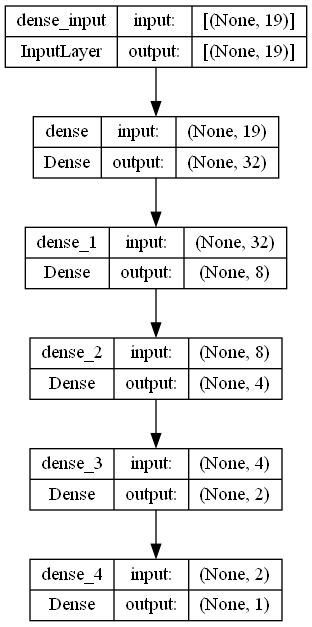

In [51]:
# Check the Sequential Model API
tf.keras.utils.plot_model(Seq_Mod, show_shapes = True)

#### 5.2 Tuned Sequential Model

In [52]:
# Defining model neurons, hidden layers
SeqTun_Mod = Sequential()
SeqTun_Mod.add(Dense(64, activation='relu', input_shape=(X_train.shape[-1],))) # Hidden Layer 1
SeqTun_Mod.add(tf.keras.layers.BatchNormalization())
SeqTun_Mod.add(Dense(32, activation = 'tanh')) # Hidden Layer 2
SeqTun_Mod.add(Dense(16, activation = 'relu')) # Hidden Layer 3
SeqTun_Mod.add(Dense(4, activation = 'relu')) # Hidden Layer 4
SeqTun_Mod.add(Dense(1, activation = 'sigmoid')) # Output layer

# Compile
SeqTun_Mod.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate = 0.0015),
              loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=True),
              metrics= f1_score_macro())
    
# Show model summary
SeqTun_Mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1280      
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 4)                 68        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                      

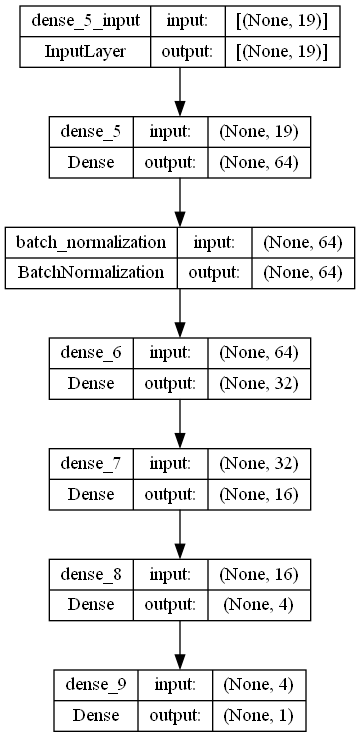

In [53]:
# Check the Sequential Model API
tf.keras.utils.plot_model(SeqTun_Mod, show_shapes = True)

#### 5.3 Functional Base Model

In [54]:
# Defining model neurons, hidden layers
input_layer = Input(shape=(X_train.shape[-1],))

hidden_layer_1A = Dense(16, activation = 'relu')(input_layer)
hidden_layer_2A = Dense(8, activation = 'relu')(hidden_layer_1A)
hidden_layer_3A = Dense(4, activation = 'relu')(hidden_layer_2A)

hidden_layer_1B = Dense(16, activation = 'relu')(input_layer)
hidden_layer_2B = Dense(8, activation = 'relu')(hidden_layer_1B)

concat_layer = concatenate([hidden_layer_3A, hidden_layer_2B])

output_layer = Dense(1, activation = 'sigmoid')(concat_layer)

Func_Mod = Model(inputs = input_layer, outputs = output_layer)

# Compile
Func_Mod.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics= f1_score_macro())

# Show model summary
Func_Mod.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 dense_10 (Dense)               (None, 16)           320         ['input_1[0][0]']                
                                                                                                  
 dense_11 (Dense)               (None, 8)            136         ['dense_10[0][0]']               
                                                                                                  
 dense_13 (Dense)               (None, 16)           320         ['input_1[0][0]']                
                                                                                              

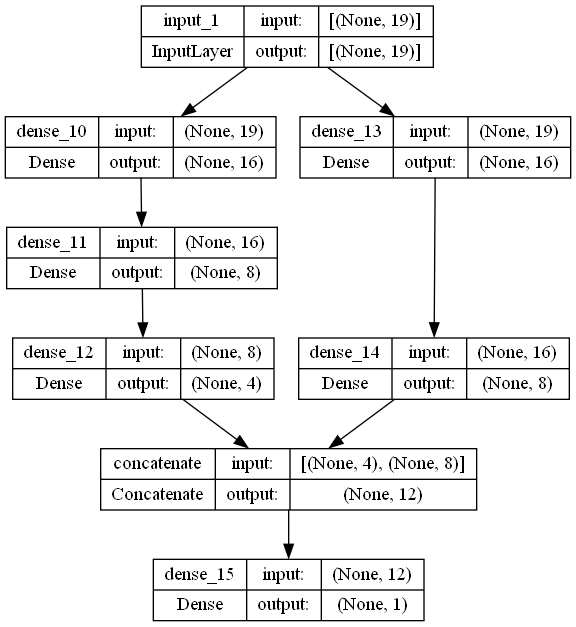

In [55]:
# Check the Functional Model API
tf.keras.utils.plot_model(Func_Mod, show_shapes = True)

#### 5.4 Function Tuned Model

In [56]:
# Defining model neurons, hidden layers
input_layer = Input(shape=(X_train.shape[-1],))

hidden_layer_1A = Dense(16, activation = 'relu')(input_layer)
hidden_layer_2A = Dense(8, activation = 'tanh')(hidden_layer_1A)
output_tensor_1A = tf.keras.layers.BatchNormalization(axis=1)(hidden_layer_2A)
hidden_layer_3A = Dense(4, activation = 'relu')(output_tensor_1A)
output_tensor_2A = tf.keras.layers.Dropout(0.1)(hidden_layer_3A)

hidden_layer_1B = Dense(16, activation = 'tanh')(input_layer)
output_tensor_1B = tf.keras.layers.BatchNormalization(axis=1)(hidden_layer_1B)
hidden_layer_2B = Dense(8, activation = 'relu')(output_tensor_1B)

concat_layer = concatenate([output_tensor_2A, hidden_layer_2B])

output_layer = Dense(1, activation = 'sigmoid')(concat_layer)

FuncTun_Mod = Model(inputs = input_layer, outputs = output_layer)

# Compile
FuncTun_Mod.compile(optimizer=tf.keras.optimizers.Adamax(learning_rate = 0.0015),
              loss=tf.keras.losses.BinaryFocalCrossentropy(from_logits=True),
              metrics= f1_score_macro())

# Show model summary
FuncTun_Mod.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 19)]         0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 16)           320         ['input_2[0][0]']                
                                                                                                  
 dense_17 (Dense)               (None, 8)            136         ['dense_16[0][0]']               
                                                                                                  
 batch_normalization_1 (BatchNo  (None, 8)           32          ['dense_17[0][0]']               
 rmalization)                                                                               

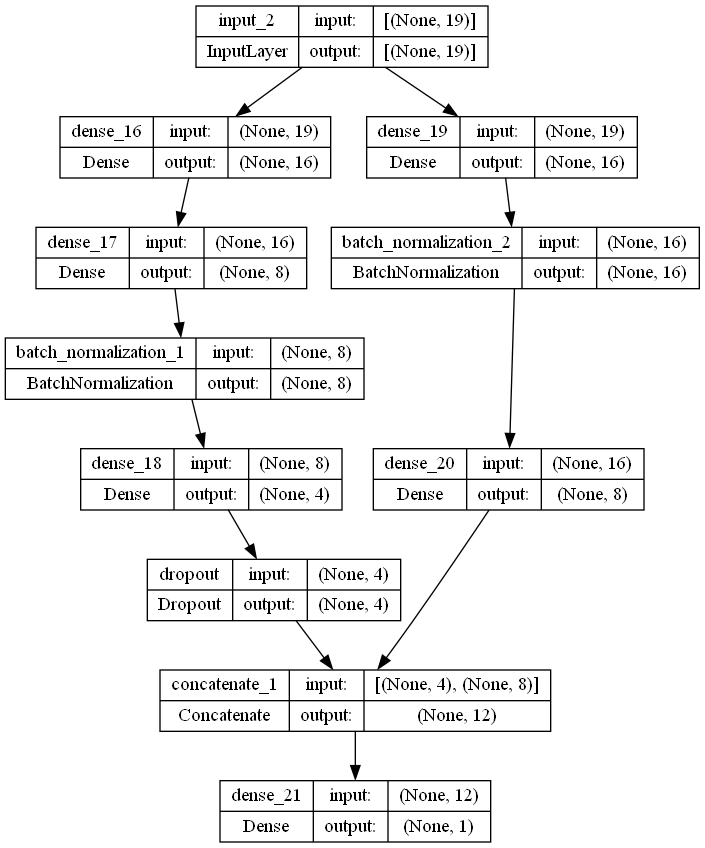

In [57]:
# Check the Functional Model API
tf.keras.utils.plot_model(FuncTun_Mod, show_shapes = True)

### 6. Model Training

In [58]:
# Describe an early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 10 ,restore_best_weights = True)

#### 6.1 Sequential Base Model

In [59]:
# Train Sequential Base Model
history_seq = Seq_Mod.fit(train_pipe, epochs = 15,validation_data = val_pipe, callbacks = [callback])

Epoch 1/15
206/206 [==============================] - 3s 7ms/step - loss: 0.5670 - f1_score_macro: 0.7089 - val_loss: 0.5568 - val_f1_score_macro: 0.6053
Epoch 2/15
206/206 [==============================] - 1s 6ms/step - loss: 0.5040 - f1_score_macro: 0.7668 - val_loss: 0.5615 - val_f1_score_macro: 0.6036
Epoch 3/15
206/206 [==============================] - 1s 6ms/step - loss: 0.5003 - f1_score_macro: 0.7701 - val_loss: 0.5374 - val_f1_score_macro: 0.6197
Epoch 4/15
206/206 [==============================] - 1s 6ms/step - loss: 0.4979 - f1_score_macro: 0.7666 - val_loss: 0.5470 - val_f1_score_macro: 0.6186
Epoch 5/15
206/206 [==============================] - 1s 6ms/step - loss: 0.4913 - f1_score_macro: 0.7697 - val_loss: 0.5075 - val_f1_score_macro: 0.6374
Epoch 6/15
206/206 [==============================] - 1s 6ms/step - loss: 0.4874 - f1_score_macro: 0.7692 - val_loss: 0.5801 - val_f1_score_macro: 0.6049
Epoch 7/15
206/206 [==============================] - 1s 6ms/step - loss: 0.

#### 6.2 Sequential Tuned Model

In [60]:
# Train Sequential Tuned Model
history_seqtun = SeqTun_Mod.fit(train_pipe, epochs = 15,validation_data = val_pipe, callbacks = [callback])

Epoch 1/15
206/206 [==============================] - 3s 9ms/step - loss: 0.1696 - f1_score_macro: 0.4980 - val_loss: 0.1547 - val_f1_score_macro: 0.4612
Epoch 2/15
206/206 [==============================] - 2s 8ms/step - loss: 0.1384 - f1_score_macro: 0.5070 - val_loss: 0.1271 - val_f1_score_macro: 0.4165
Epoch 3/15
206/206 [==============================] - 2s 8ms/step - loss: 0.1241 - f1_score_macro: 0.5786 - val_loss: 0.1282 - val_f1_score_macro: 0.5179
Epoch 4/15
206/206 [==============================] - 2s 9ms/step - loss: 0.1111 - f1_score_macro: 0.6522 - val_loss: 0.1258 - val_f1_score_macro: 0.5326
Epoch 5/15
206/206 [==============================] - 2s 8ms/step - loss: 0.0964 - f1_score_macro: 0.7321 - val_loss: 0.1313 - val_f1_score_macro: 0.5148
Epoch 6/15
206/206 [==============================] - 2s 7ms/step - loss: 0.0866 - f1_score_macro: 0.7848 - val_loss: 0.1236 - val_f1_score_macro: 0.5326
Epoch 7/15
206/206 [==============================] - 2s 8ms/step - loss: 0.

#### 6.3 Functional Base Model

In [61]:
# Train Functional Base Model
history_func = Func_Mod.fit(train_pipe, epochs = 15,validation_data = val_pipe, callbacks = [callback])

Epoch 1/15
206/206 [==============================] - 2s 7ms/step - loss: 0.5809 - f1_score_macro: 0.7283 - val_loss: 0.5743 - val_f1_score_macro: 0.6023
Epoch 2/15
206/206 [==============================] - 1s 6ms/step - loss: 0.5091 - f1_score_macro: 0.7572 - val_loss: 0.5723 - val_f1_score_macro: 0.6186
Epoch 3/15
206/206 [==============================] - 1s 6ms/step - loss: 0.4941 - f1_score_macro: 0.7590 - val_loss: 0.6094 - val_f1_score_macro: 0.5978
Epoch 4/15
206/206 [==============================] - 1s 6ms/step - loss: 0.4873 - f1_score_macro: 0.7707 - val_loss: 0.6158 - val_f1_score_macro: 0.5967
Epoch 5/15
206/206 [==============================] - 1s 6ms/step - loss: 0.4929 - f1_score_macro: 0.7682 - val_loss: 0.5045 - val_f1_score_macro: 0.6441
Epoch 6/15
206/206 [==============================] - 1s 6ms/step - loss: 0.4882 - f1_score_macro: 0.7689 - val_loss: 0.5762 - val_f1_score_macro: 0.6074
Epoch 7/15
206/206 [==============================] - 1s 6ms/step - loss: 0.

#### 6.4 Functional Tuned Model

In [62]:
# Train Functional Tuned Model
history_functun = FuncTun_Mod.fit(train_pipe, epochs = 15,validation_data = val_pipe, callbacks = [callback])

Epoch 1/15
206/206 [==============================] - 3s 10ms/step - loss: 0.1928 - f1_score_macro: 0.5651 - val_loss: 0.1583 - val_f1_score_macro: 0.3189
Epoch 2/15
206/206 [==============================] - 2s 10ms/step - loss: 0.1488 - f1_score_macro: 0.4983 - val_loss: 0.1323 - val_f1_score_macro: 0.2953
Epoch 3/15
206/206 [==============================] - 2s 9ms/step - loss: 0.1383 - f1_score_macro: 0.4544 - val_loss: 0.1290 - val_f1_score_macro: 0.3868
Epoch 4/15
206/206 [==============================] - 2s 10ms/step - loss: 0.1305 - f1_score_macro: 0.5185 - val_loss: 0.1282 - val_f1_score_macro: 0.4632
Epoch 5/15
206/206 [==============================] - 2s 9ms/step - loss: 0.1225 - f1_score_macro: 0.5860 - val_loss: 0.1265 - val_f1_score_macro: 0.4652
Epoch 6/15
206/206 [==============================] - 2s 9ms/step - loss: 0.1154 - f1_score_macro: 0.6373 - val_loss: 0.1303 - val_f1_score_macro: 0.5236
Epoch 7/15
206/206 [==============================] - 2s 9ms/step - loss:

### 7. Model Evaluation

In [63]:
# Define function for Train - Validation Report
def TrValRep(model_history):
    print('Train - Validation Performance Report')
    pd.DataFrame(model_history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

In [64]:
# Define function for Train - Test Report
def TrTeRep(model, X_test, y_test):
    print('Train - Test Classification Report')
    ME = model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred = np.where(y_pred >= 0.5, 1, 0)
    print('loss     :', ME[0])
    print('f1_score :', ME[1])
    print('\n classification report \n',classification_report(y_test, y_pred))

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
    cm_display.plot()
    plt.show()

#### 7.1 Sequential Base Model

Train - Validation Performance Report


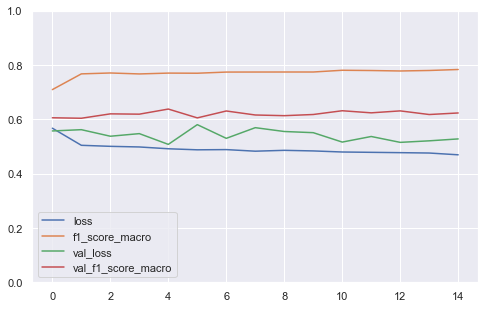

Train - Test Classification Report
44/44 [==============================] - 0s 1ms/step
loss     : 0.5235163569450378
f1_score : 0.5923632383346558

 classification report 
               precision    recall  f1-score   support

         0.0       0.92      0.69      0.79      1055
         1.0       0.46      0.82      0.59       350

    accuracy                           0.72      1405
   macro avg       0.69      0.75      0.69      1405
weighted avg       0.81      0.72      0.74      1405



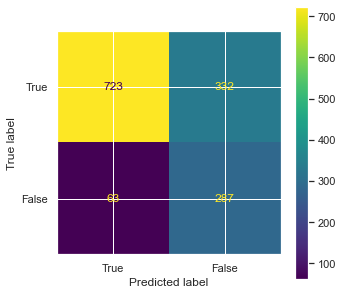

In [65]:
# Train - Validation Report
TrValRep(history_seq)

# Train - Test Report
TrTeRep(Seq_Mod, X_test, y_test)

#### 7.2 Sequential Tuned Model

Train - Validation Performance Report


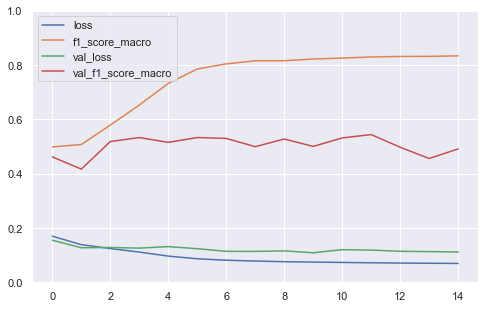

Train - Test Classification Report
44/44 [==============================] - 0s 2ms/step
loss     : 0.1116277202963829
f1_score : 0.46935200691223145

 classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.86      1055
         1.0       0.61      0.38      0.47       350

    accuracy                           0.78      1405
   macro avg       0.71      0.65      0.67      1405
weighted avg       0.76      0.78      0.77      1405



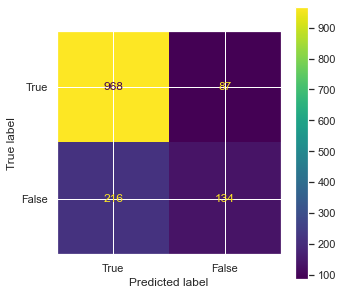

In [66]:
# Train - Validation Report
TrValRep(history_seqtun)

# Train - Test Report
TrTeRep(SeqTun_Mod, X_test, y_test)

#### 7.3 Functional Base Model

Train - Validation Performance Report


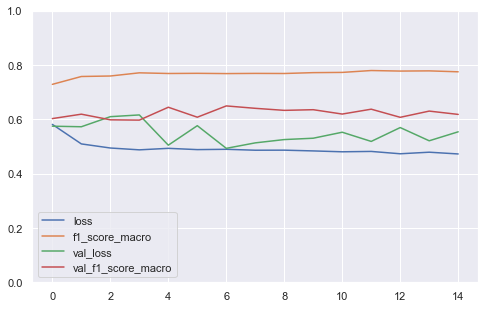

Train - Test Classification Report
44/44 [==============================] - 0s 1ms/step
loss     : 0.5563336610794067
f1_score : 0.5910852551460266

 classification report 
               precision    recall  f1-score   support

         0.0       0.94      0.64      0.76      1055
         1.0       0.45      0.87      0.59       350

    accuracy                           0.70      1405
   macro avg       0.69      0.76      0.68      1405
weighted avg       0.82      0.70      0.72      1405



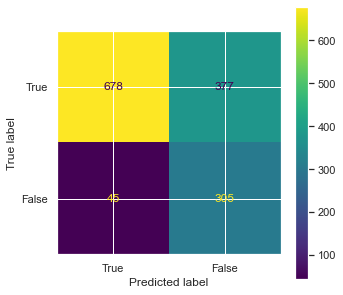

In [67]:
# Train - Validation Report
TrValRep(history_func)

# Train - Test Report
TrTeRep(Func_Mod, X_test, y_test)

#### 7.4 Functional Tuned Model

Train - Validation Performance Report


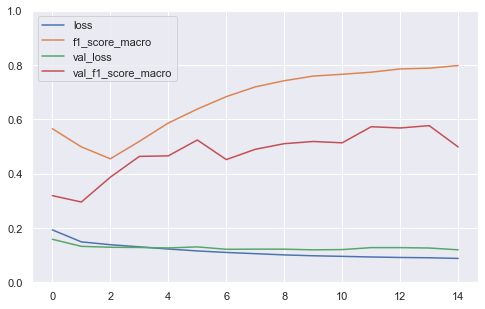

Train - Test Classification Report
44/44 [==============================] - 0s 2ms/step
loss     : 0.12022871524095535
f1_score : 0.4756944477558136

 classification report 
               precision    recall  f1-score   support

         0.0       0.82      0.92      0.86      1055
         1.0       0.61      0.39      0.48       350

    accuracy                           0.79      1405
   macro avg       0.71      0.65      0.67      1405
weighted avg       0.77      0.79      0.77      1405



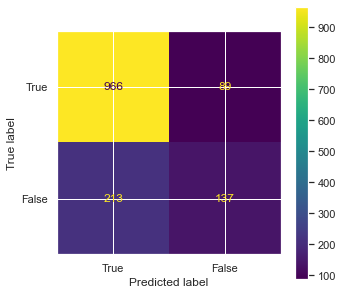

In [68]:
# Train - Validation Report
TrValRep(history_functun)

# Train - Test Report
TrTeRep(FuncTun_Mod, X_test, y_test)

Statement :<br>
Since the composition of target is not balanced, therefore we can focus on Precision and F1_score in macro average.<br>
The reason is putting more attention on 'about to churn' customer will help the company to prevent from customer churned.<br>
We can see that based on scoring method mentioned before, Functional Tuned Model performed better compared to other models that have been trained.

### 8. Model Saving

In [69]:
# Model saving
with open('Processer.pkl', 'wb') as file_1:
  joblib.dump(ScalEnd, file_1)

FuncTun_Mod.trainable = False # Freeze the model
FuncTun_Mod.save('PredictModel.h5')

### 9. Model Inference

In [70]:
# Preprocess the inference data using pipeline
data_inf_processed = ScalEnd.transform(data_inf)

# Predict using Gradient Boost Base Model
y_pred_inf = FuncTun_Mod.predict(data_inf_processed)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf_df = (pd.DataFrame(y_pred_inf, columns = ['Churn Predict']))
y_pred_inf_df = y_pred_inf_df['Churn Predict'].map({0 : 'No', 1 : 'Yes'})

pd.concat([data_inf, y_pred_inf_df], axis = 1)

1/1 [==============================] - 0s 17ms/step


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn Predict
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1859.10,No,No
1,Female,1,Yes,No,16,Yes,Yes,Fiber optic,No,No,...,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.35,1375.15,Yes,Yes
2,Female,0,No,No,63,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),97.45,6253.00,No,No
3,Female,0,No,No,9,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,76.85,663.55,No,Yes
4,Female,0,No,No,13,Yes,No,Fiber optic,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,81.15,952.30,Yes,No
5,Male,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.30,144.00,No,Yes
6,Male,0,No,Yes,30,No,No phone service,DSL,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.50,1307.80,No,No
7,Female,1,Yes,No,47,Yes,Yes,Fiber optic,Yes,No,...,No,No,No,Month-to-month,No,Electronic check,80.35,3825.85,Yes,No
8,Female,0,No,Yes,35,Yes,No,DSL,Yes,Yes,...,No,No,No,One year,No,Credit card (automatic),55.60,2016.45,No,No
9,Male,1,Yes,Yes,32,Yes,No,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Mailed check,93.95,2861.45,No,No


#### 10. Conclusions
##### EDA
1. Most customers pay monthly contract. While the most profitable payments contract is yearly contract ( since the company obtain a larger amount of fresh cash in short time ), added bonus on yearly contract will surely increase the number of customers who paid for yearly contract.
2. Most of customers last either in very short of time period or very long time period.
3. Based on Churned Status ratio, we can clearly that Senior Citizen are more likely to churned compared to Younger Citizen. 
4. Giving discounts to new customers in order to make them do yearly contract payments will surely reduce the number of churned customers, or at least increase revenue.
##### Model
1. Column that greatly affects churn possibility are tenure, TotalCharges, MonthlyCharges, Contract, OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection, SeniorCitizen, and Dependents.
2. Functional Tuned Model succeeded in creating the best model for this type of data from all the experiments that have been done.
3. After more than 50 times of parameters tuning, I can say that Artificial Neural Network isn't very suitable for this type of classification data. Besides that, small data set with target imbalance contribute to a greater problem. Undersampling data won't be performed since the data set is relatively small, yet oversampling will only increase the data bias. A larger data set is needed here.